In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
tickers = ["LLOY.L", "VOD.L", "RR.L", "^FTSE"]
risk_tickers = ["LLOY.L", "VOD.L", "RR.L"]

In [3]:
end_date = datetime.today()

In [4]:
start_date = end_date - timedelta(days=2*365)

In [5]:
close_df = pd.DataFrame()

In [6]:
for ticker in tickers:
    close_df[ticker] = yf.download(ticker, start_date, end_date)['Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
close_df

,LLOY.L,VOD.L,RR.L,^FTSE
Date,,,,
2021-12-06,46.275002,112.879997,129.699997,7232.299805
2021-12-07,47.485001,111.879997,131.800003,7339.899902
2021-12-08,47.365002,113.099998,128.639999,7337.399902
2021-12-09,46.695000,113.199997,124.300003,7321.299805
2021-12-10,46.334999,113.199997,122.800003,7291.799805
...,...,...,...,...
2023-11-28,42.450001,70.860001,258.299988,7455.200195
2023-11-29,43.450001,70.809998,263.399994,7423.500000
2023-11-30,43.470001,71.330002,268.799988,7453.799805


In [8]:
returns = close_df.pct_change().dropna()
returns

C:\Users\MSI\AppData\Local\Temp\ipykernel_11996\2299349210.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = close_df.pct_change().dropna()


,LLOY.L,VOD.L,RR.L,^FTSE
Date,,,,
2021-12-07,0.026148,-0.008859,0.016191,0.014878
2021-12-08,-0.002527,0.010905,-0.023976,-0.000341
2021-12-09,-0.014146,0.000884,-0.033738,-0.002194
2021-12-10,-0.007710,0.000000,-0.012068,-0.004029
2021-12-13,-0.042840,-0.006537,-0.047720,-0.008283
...,...,...,...,...
2023-11-28,0.009513,-0.002534,0.062089,-0.000737
2023-11-29,0.023557,-0.000706,0.019745,-0.004252
2023-11-30,0.000460,0.007344,0.020501,0.004082


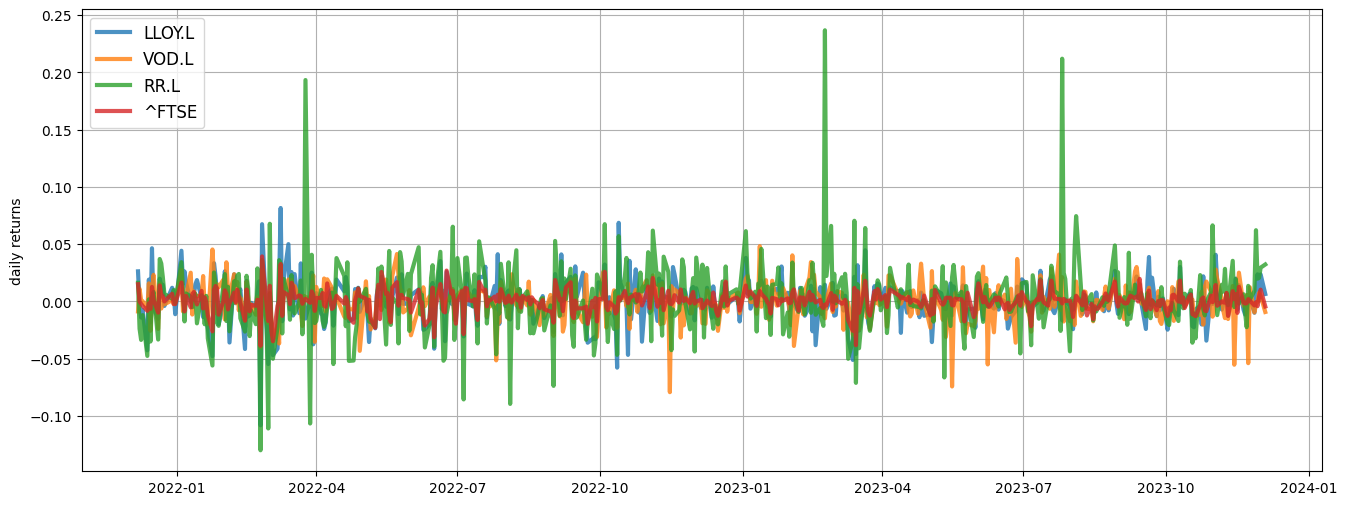

In [9]:
# plot the returns
plt.figure(figsize=(16, 6))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('daily returns')
plt.grid(True)
plt.show()


In [10]:
cov_matrix = returns.cov()
cov_matrix


,LLOY.L,VOD.L,RR.L,^FTSE
LLOY.L,0.000335,0.000086,0.000259,0.000112
VOD.L,0.000086,0.000257,0.000097,0.000056
RR.L,0.000259,0.000097,0.000958,0.000135
^FTSE,0.000112,0.000056,0.000135,0.000081


In [11]:
# variance and return of each ticker
var = returns.var()
var

LLOY.L    0.000335
VOD.L     0.000257
RR.L      0.000958
^FTSE     0.000081
dtype: float64

In [12]:
ret = returns.mean()
ret

LLOY.L    0.000102
VOD.L    -0.000798
RR.L      0.002045
^FTSE     0.000112
dtype: float64

In [13]:
cov_matrix.iloc[-1, :-1]

LLOY.L    0.000112
VOD.L     0.000056
RR.L      0.000135
Name: ^FTSE, dtype: float64

In [14]:
cov_matrix

,LLOY.L,VOD.L,RR.L,^FTSE
LLOY.L,0.000335,0.000086,0.000259,0.000112
VOD.L,0.000086,0.000257,0.000097,0.000056
RR.L,0.000259,0.000097,0.000958,0.000135
^FTSE,0.000112,0.000056,0.000135,0.000081


In [15]:
var[-1]

C:\Users\MSI\AppData\Local\Temp\ipykernel_11996\2241979073.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  var[-1]


8.079757185733946e-05

In [16]:
# the last ticker is the market
# β is the covariance of the ticker with the market divided by the variance of the market
β = cov_matrix.iloc[-1, :-1] / var[-1]
β

C:\Users\MSI\AppData\Local\Temp\ipykernel_11996\3144020697.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  β = cov_matrix.iloc[-1, :-1] / var[-1]


LLOY.L    1.391282
VOD.L     0.692292
RR.L      1.673460
Name: ^FTSE, dtype: float64

In [17]:
# sharpes ratio
sharpes = pd.DataFrame()
sharpes['Sharpe'] = (close_df[portfolio_tickers].pct_change().dropna().mean() / close_df[portfolio_tickers].pct_change().dropna().std()) * np.sqrt(252)
sharpes = sharpes.iloc[:, 0]
sharpes = sharpes.sort_values(ascending=False)
sharpes

NameError: name 'portfolio_tickers' is not defined

In [ ]:
# random portfolio

np.random.seed(42)
weights = np.random.random(len(tickers)-1)
weights /= np.sum(weights)
weights

array([0.18205878, 0.46212909, 0.35581214])

In [ ]:
portfolio_tickers = [tickers[i] for i in range(len(tickers)-1)]
portfolio_tickers

['LLOY.L', 'VOD.L', 'RR.L']

In [ ]:
ret[:-1]

LLOY.L   -0.000045
VOD.L    -0.000742
RR.L      0.001817
dtype: float64

In [ ]:
# annual portfolio return
portfolio_return = np.sum(ret[:-1] * weights) * 252
portfolio_return

0.07454269737437803

In [ ]:
# portfolio variance
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix.iloc[:-1,:-1] * 252, weights))
portfolio_variance

0.06731819491460037

In [ ]:
β_p = np.dot(weights.T, β)
β_p

1.1734613362379673

In [18]:
from dotenv import load_dotenv
import os

load_dotenv()

API_KEY = os.getenv("API_KEY")

In [19]:
from fredapi import Fred
fred = Fred(api_key=API_KEY)
rate=fred.get_series_latest_release('IRLTLT01GBM156N')/100
rf=rate.iloc[-1]
rf


0.045695